In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# change dpi of plots to 300
plt.rcParams['figure.dpi'] = 300

ModuleNotFoundError: No module named 'bs4'

In [330]:

pwd = os.getcwd()
print(pwd)
os.makedirs(pwd + '/Lab5/Q1', exist_ok=True)
os.makedirs(pwd + '/Lab5/Q2', exist_ok=True)


url = 'http://intranet.daiict.ac.in/~daiict_nt01/Lecture/Arnab%20Kumar/Winter/CS302/lab_work/Debian/'
folder_path = pwd + '/Lab5/Q1'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
links = soup.find_all('a')

for link in links:
    file_name = link['href']
    if file_name.endswith('/'):
        continue
    file_url = url + file_name
    file_response = requests.get(file_url)
    with open(os.path.join(folder_path, file_name), 'wb') as f:
        f.write(file_response.content)
#  http://intranet.daiict.ac.in/~daiict_nt01/Lecture/Arnab%20Kumar/Winter/CS302/lab_work/Debian/ download all files from this directory and place it folder Lab5/Q1


/Users/divya/Documents/Semester-6/Modelling and Simulation/Labs


In [331]:
pwd = os.getcwd()
print(pwd)
path = pwd + '/Lab5/'

/Users/divya/Documents/Semester-6/Modelling and Simulation/Labs


In [332]:
# read all files ending with .dat in folder pwd + Lab5/Q1 

curr_dir = pwd + '/Lab5/Q1'
files = os.listdir(curr_dir)
files = [file for file in files if file.endswith('.dat')]
print(files)



['out_etch.dat', 'out_lenny.dat', 'in_lenny.dat', 'out_squeeze.dat', 'in_squeeze.dat', 'in_etch.dat']


In [333]:
def phi_x(ita,x,lmda, mu, alph,c):
    return (ita + (((x+lmda)/c)**(-mu*alph)))**(-1/mu)

In [334]:
# ['out_etch.dat', 'out_lenny.dat', 'in_lenny.dat', 'out_squeeze.dat', 'in_squeeze.dat', 'in_etch.dat']

dict_out_etch = {}; dict_out_lenny = {}; dict_in_lenny = {}; dict_out_squeeze = {}; dict_in_squeeze = {}; dict_in_etch = {}
dict_in_etch['alpha'] = -2; dict_in_etch['ita'] = -8; dict_in_etch['lmda'] = 1.5; dict_in_etch['mu'] = -1; dict_in_etch['c'] = 190

dict_out_etch['alpha'] = -2; dict_out_etch['ita'] = 1; dict_out_etch['lmda'] = 0.25; dict_out_etch['mu'] = -1; dict_out_etch['c'] = 80

dict_in_lenny['alpha'] = -2; dict_in_lenny['ita'] = -15; dict_in_lenny['lmda'] = 1.6; dict_in_lenny['mu'] = -1; dict_in_lenny['c'] = 210

dict_out_lenny['alpha'] = -2; dict_out_lenny['ita'] = 1; dict_out_lenny['lmda'] = 0.35; dict_out_lenny['mu'] = -1; dict_out_lenny['c'] = 90

dict_in_squeeze['alpha'] = -2; dict_in_squeeze['ita'] = -28; dict_in_squeeze['lmda'] = 2.2; dict_in_squeeze['mu'] = -1; dict_in_squeeze['c'] = 265

dict_out_squeeze['alpha'] = -2; dict_out_squeeze['ita'] = 1; dict_out_squeeze['lmda'] = 0.45; dict_out_squeeze['mu'] = -1; dict_out_squeeze['c'] = 110


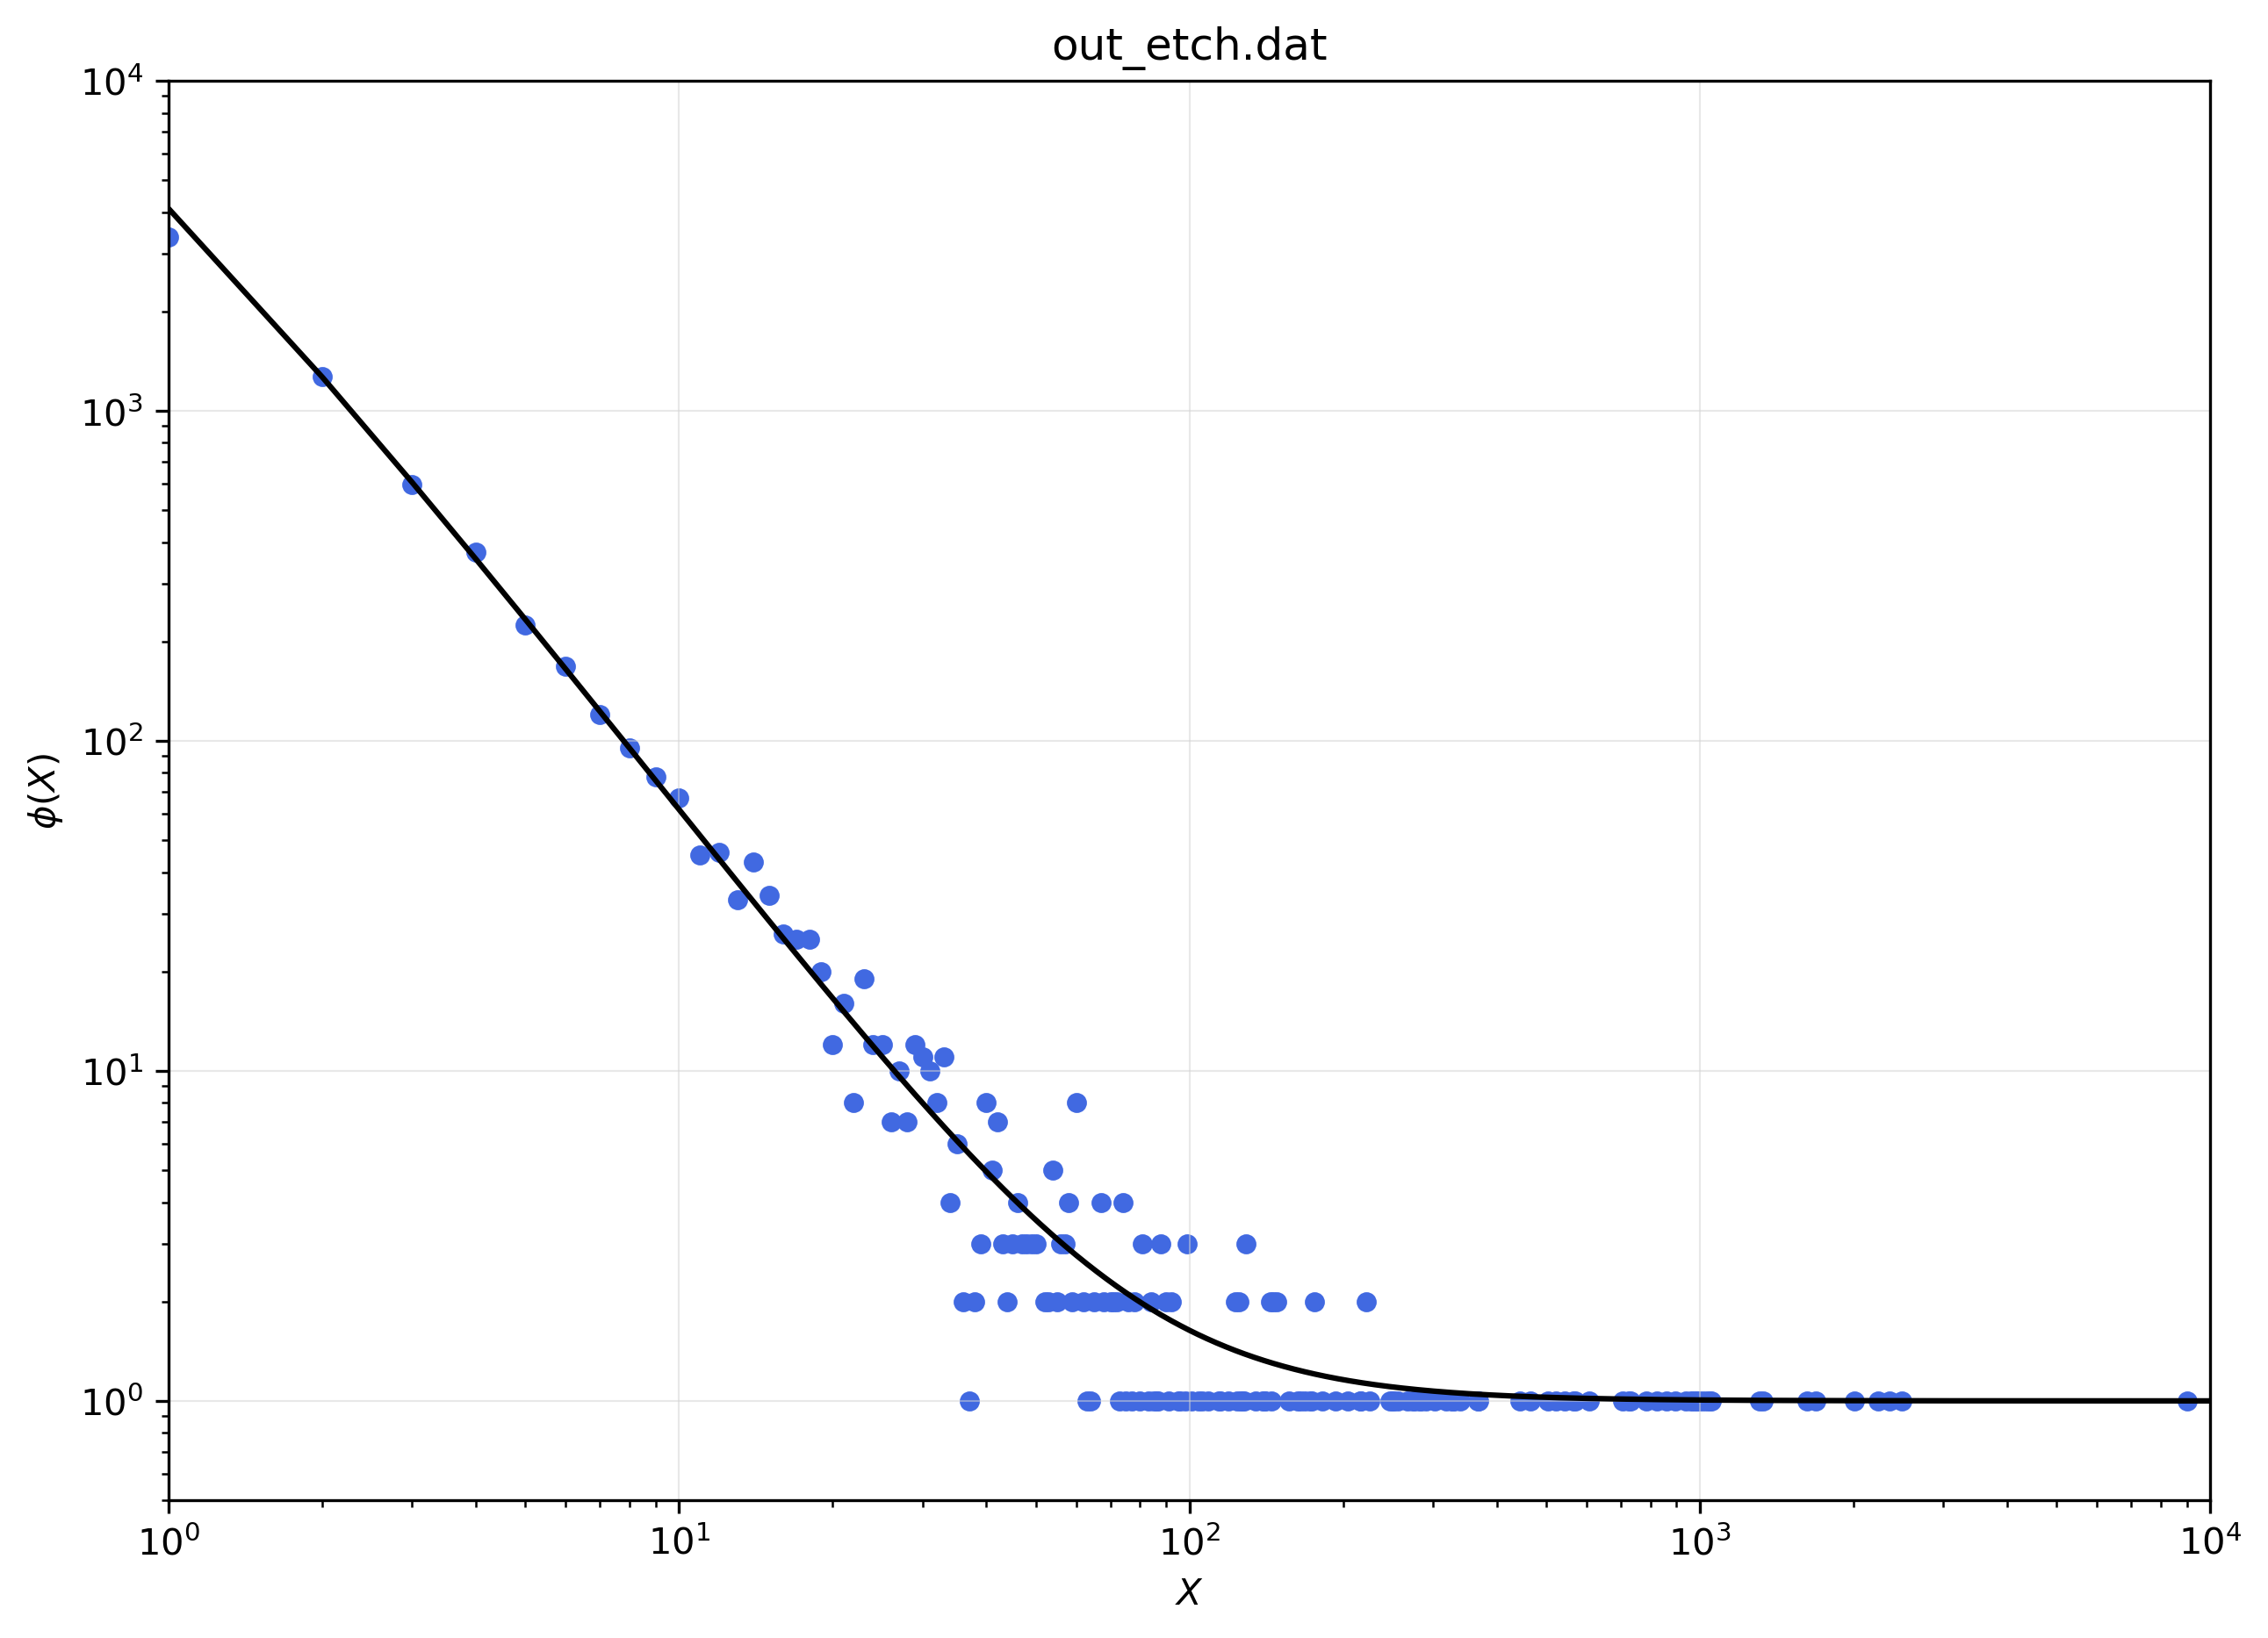

Mean Relative Error :  -0.04733109604795089
----------------------------------------------------------------------------------------------------------------------


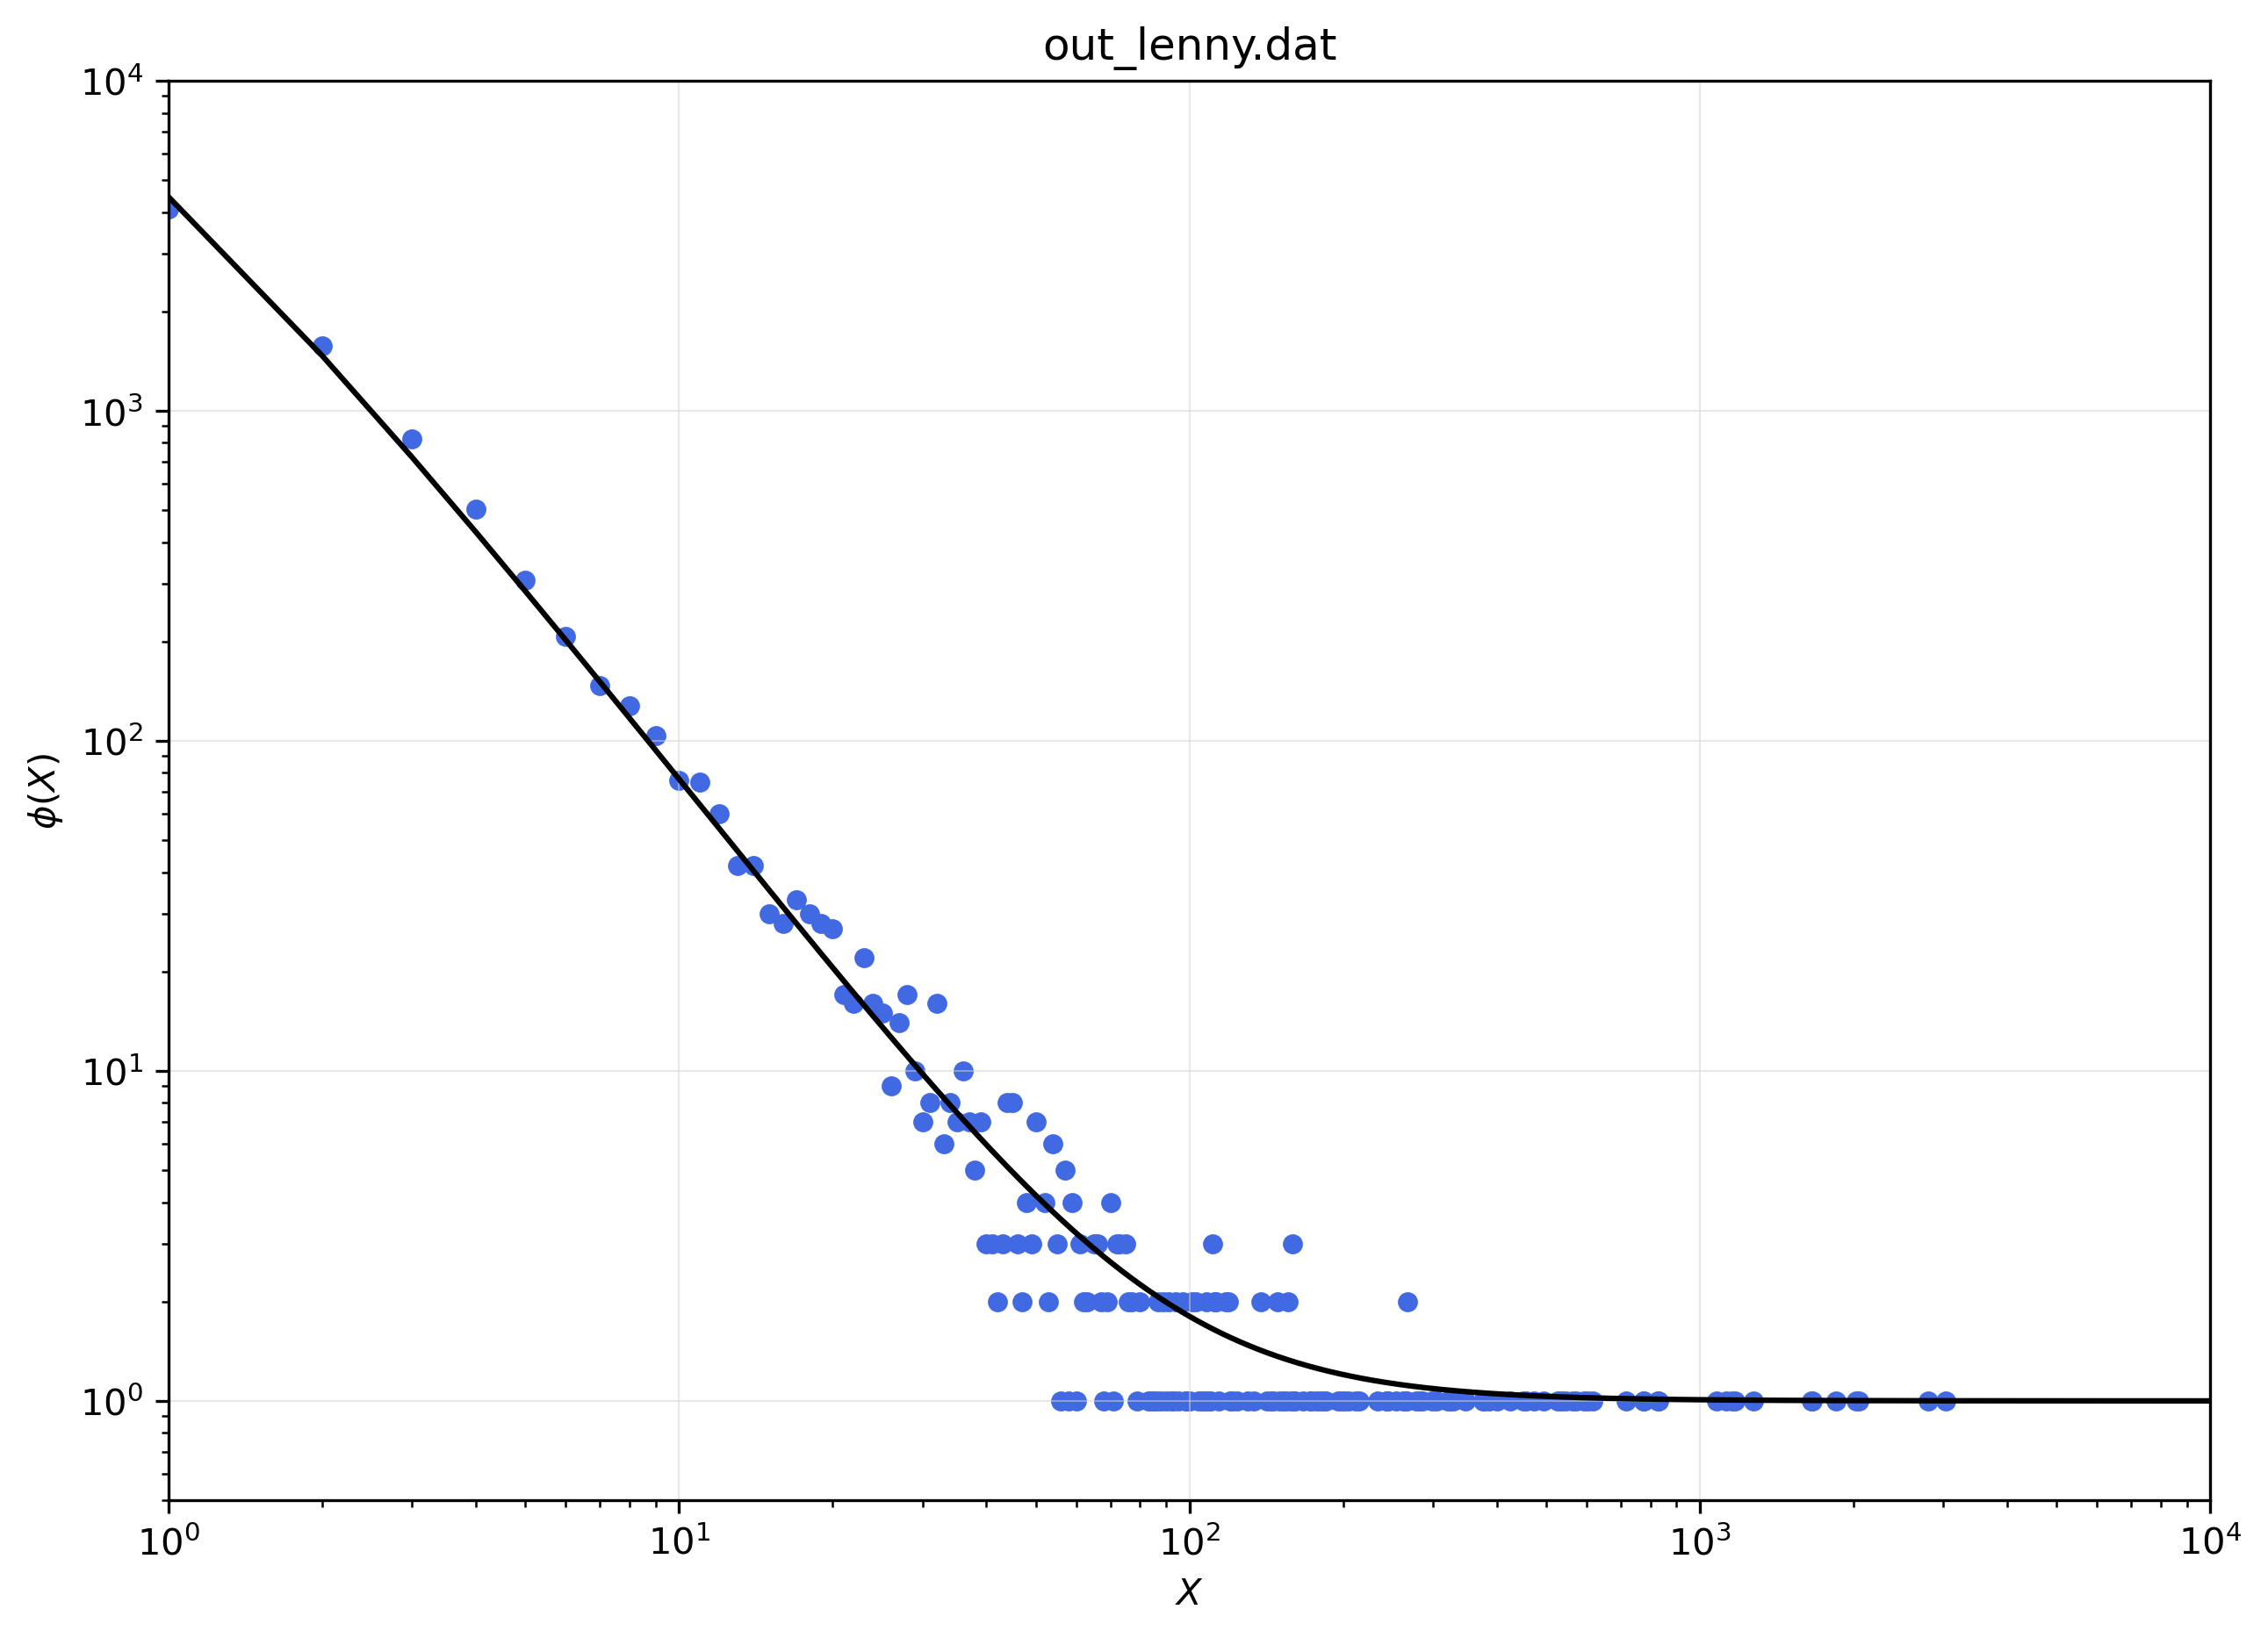

Mean Relative Error :  -0.07680034104105946
----------------------------------------------------------------------------------------------------------------------


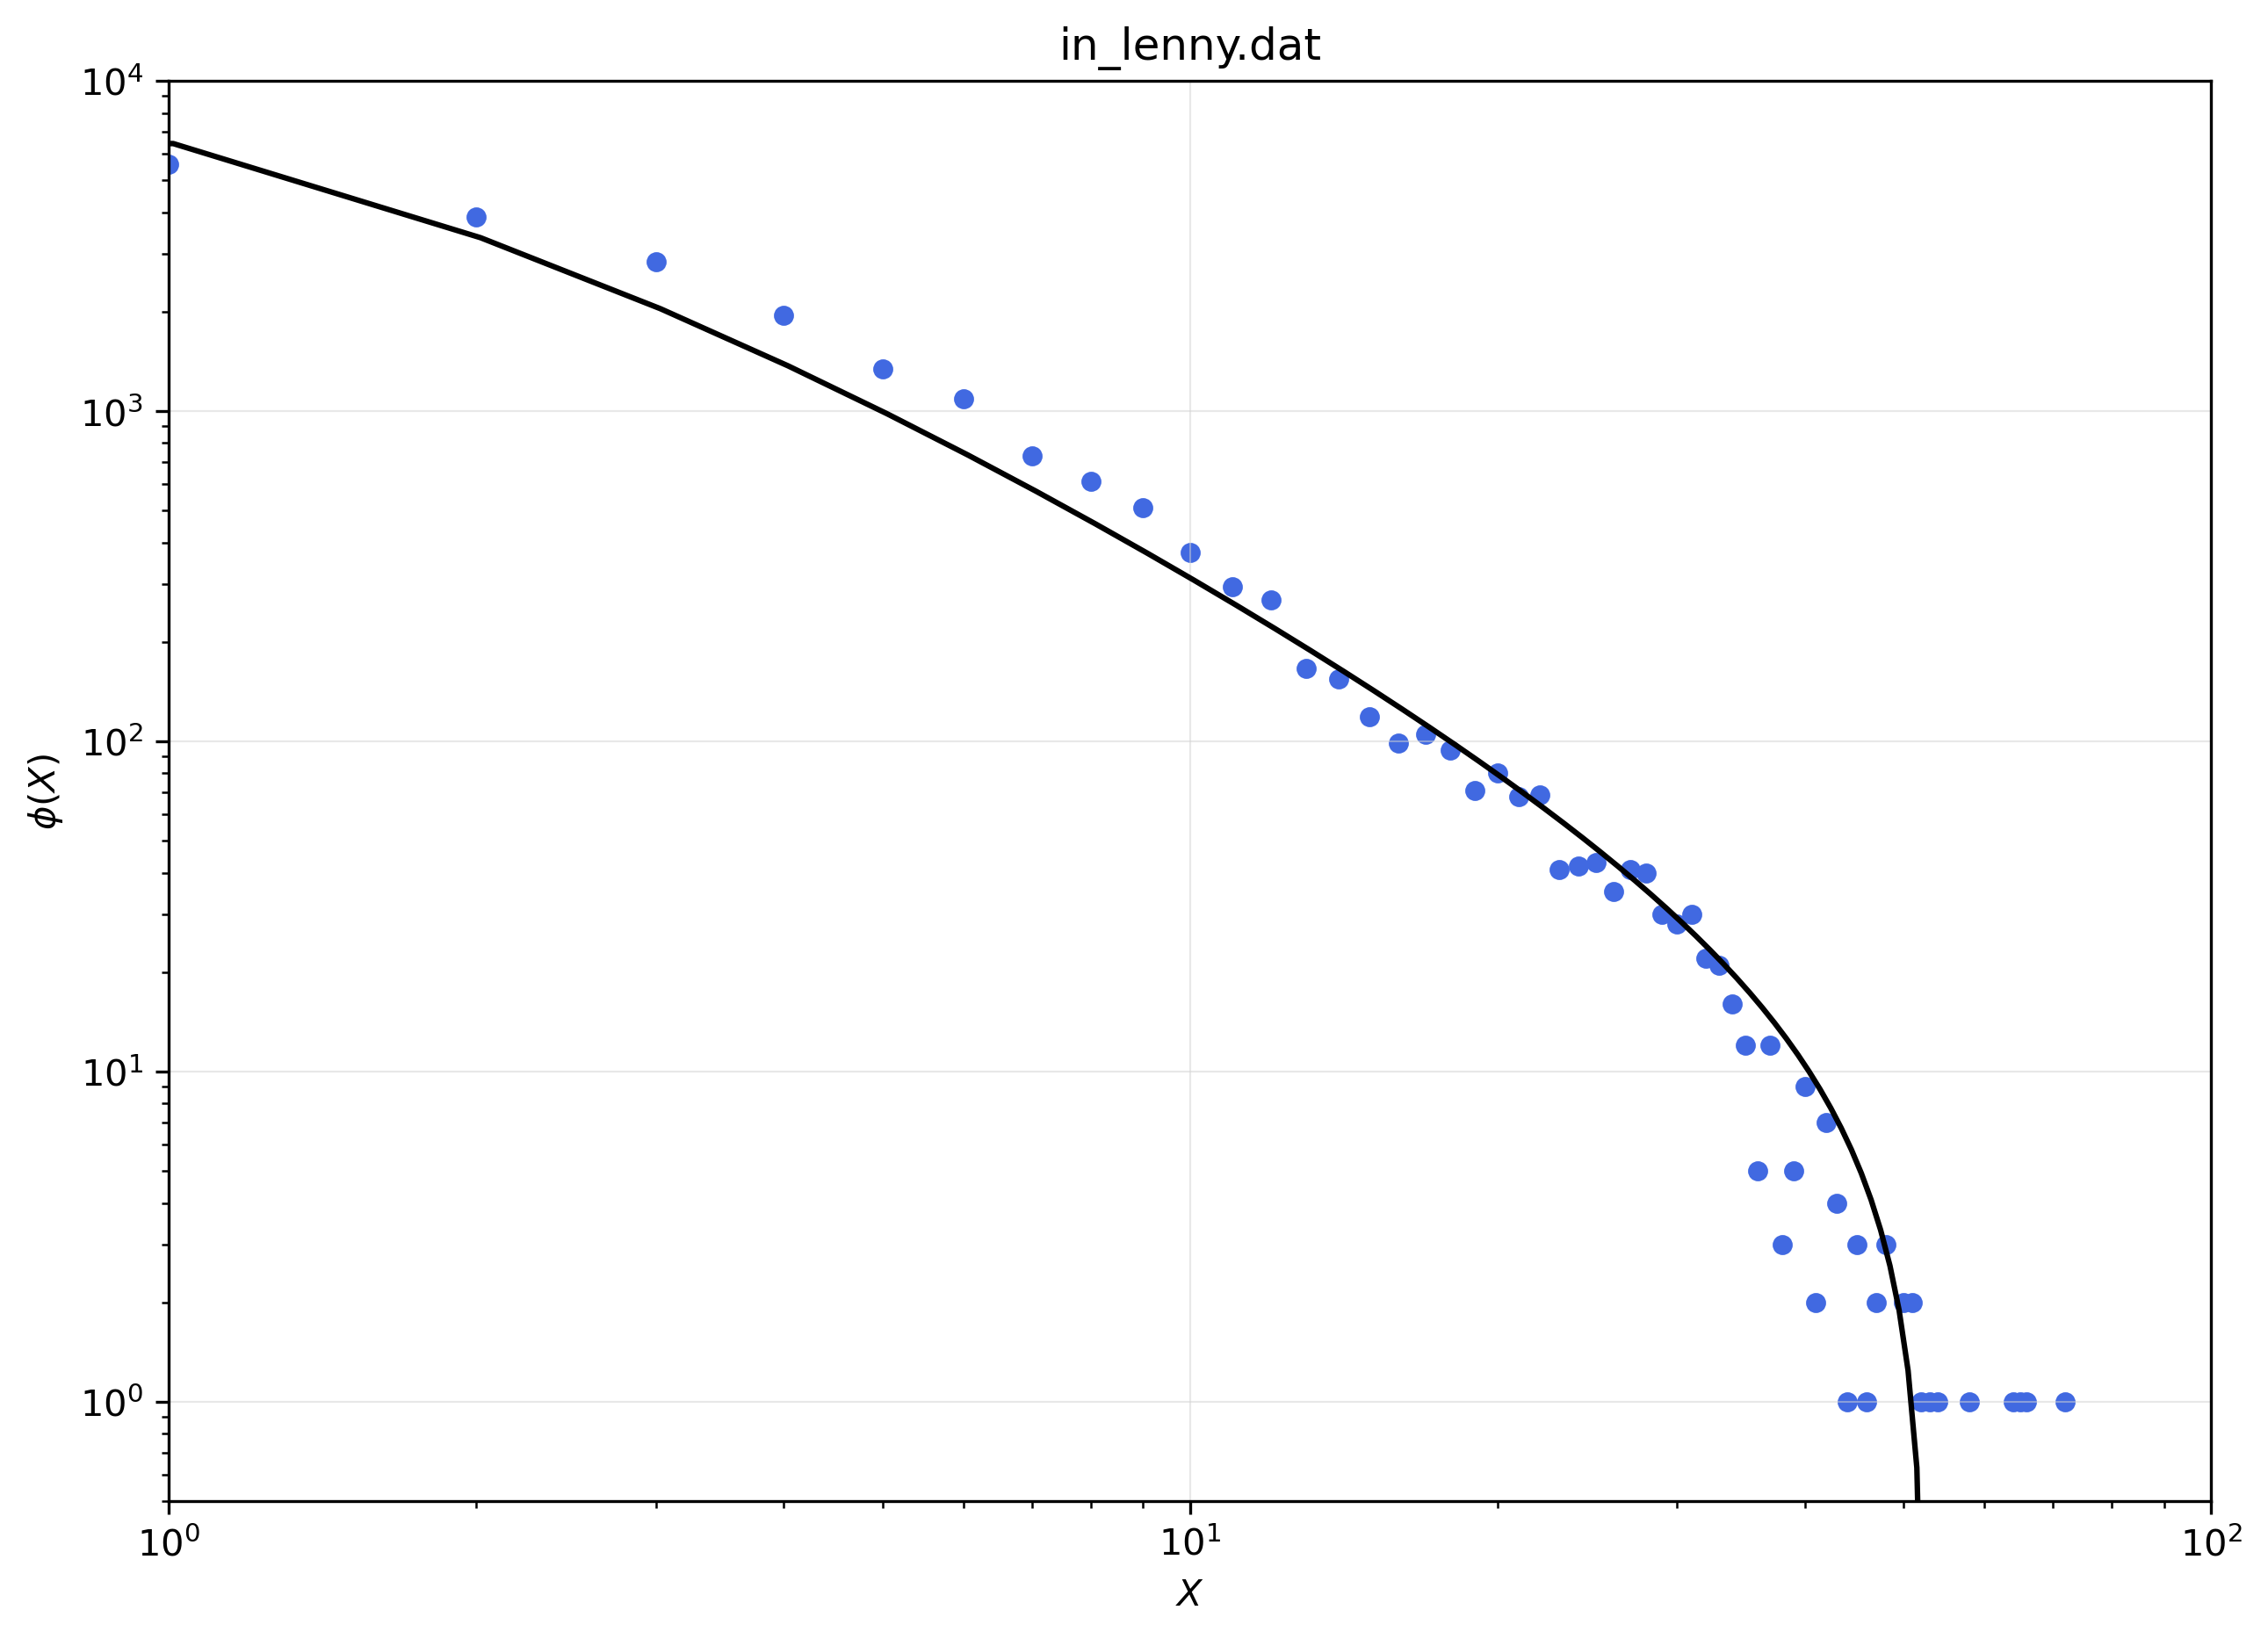

Mean Relative Error :  -0.30504537009305227
----------------------------------------------------------------------------------------------------------------------


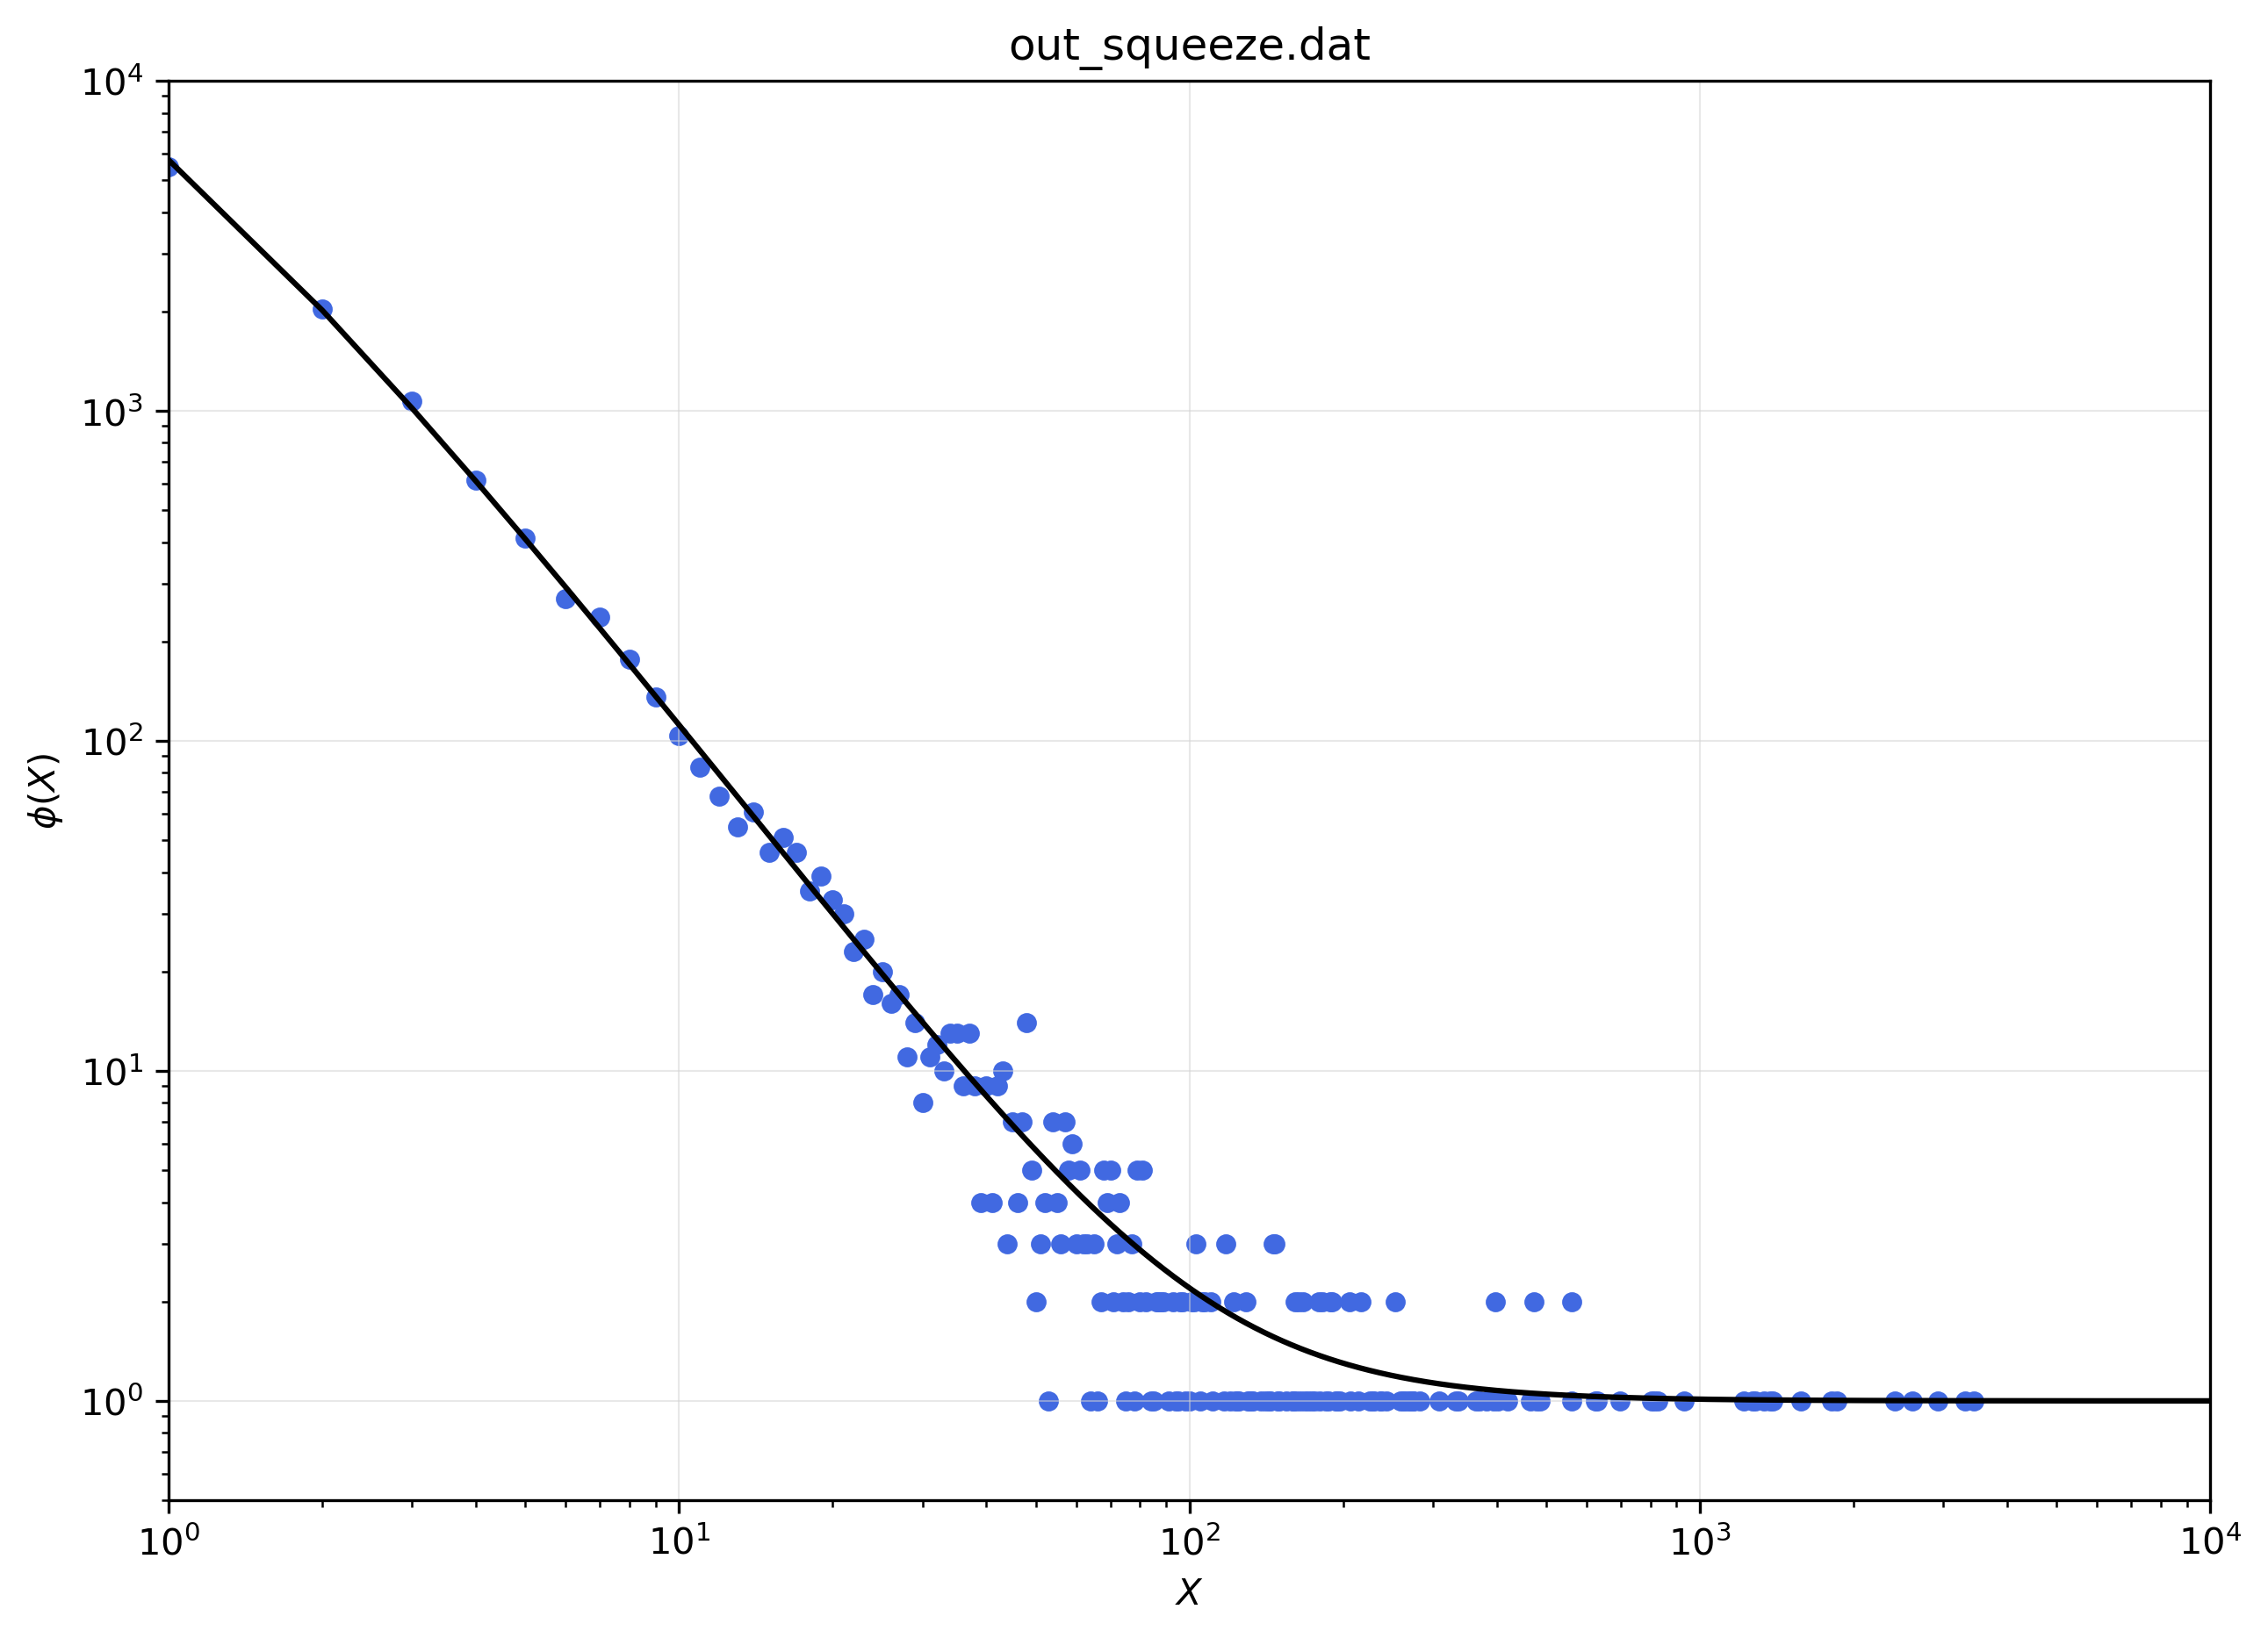

Mean Relative Error :  -0.08033180440977951
----------------------------------------------------------------------------------------------------------------------


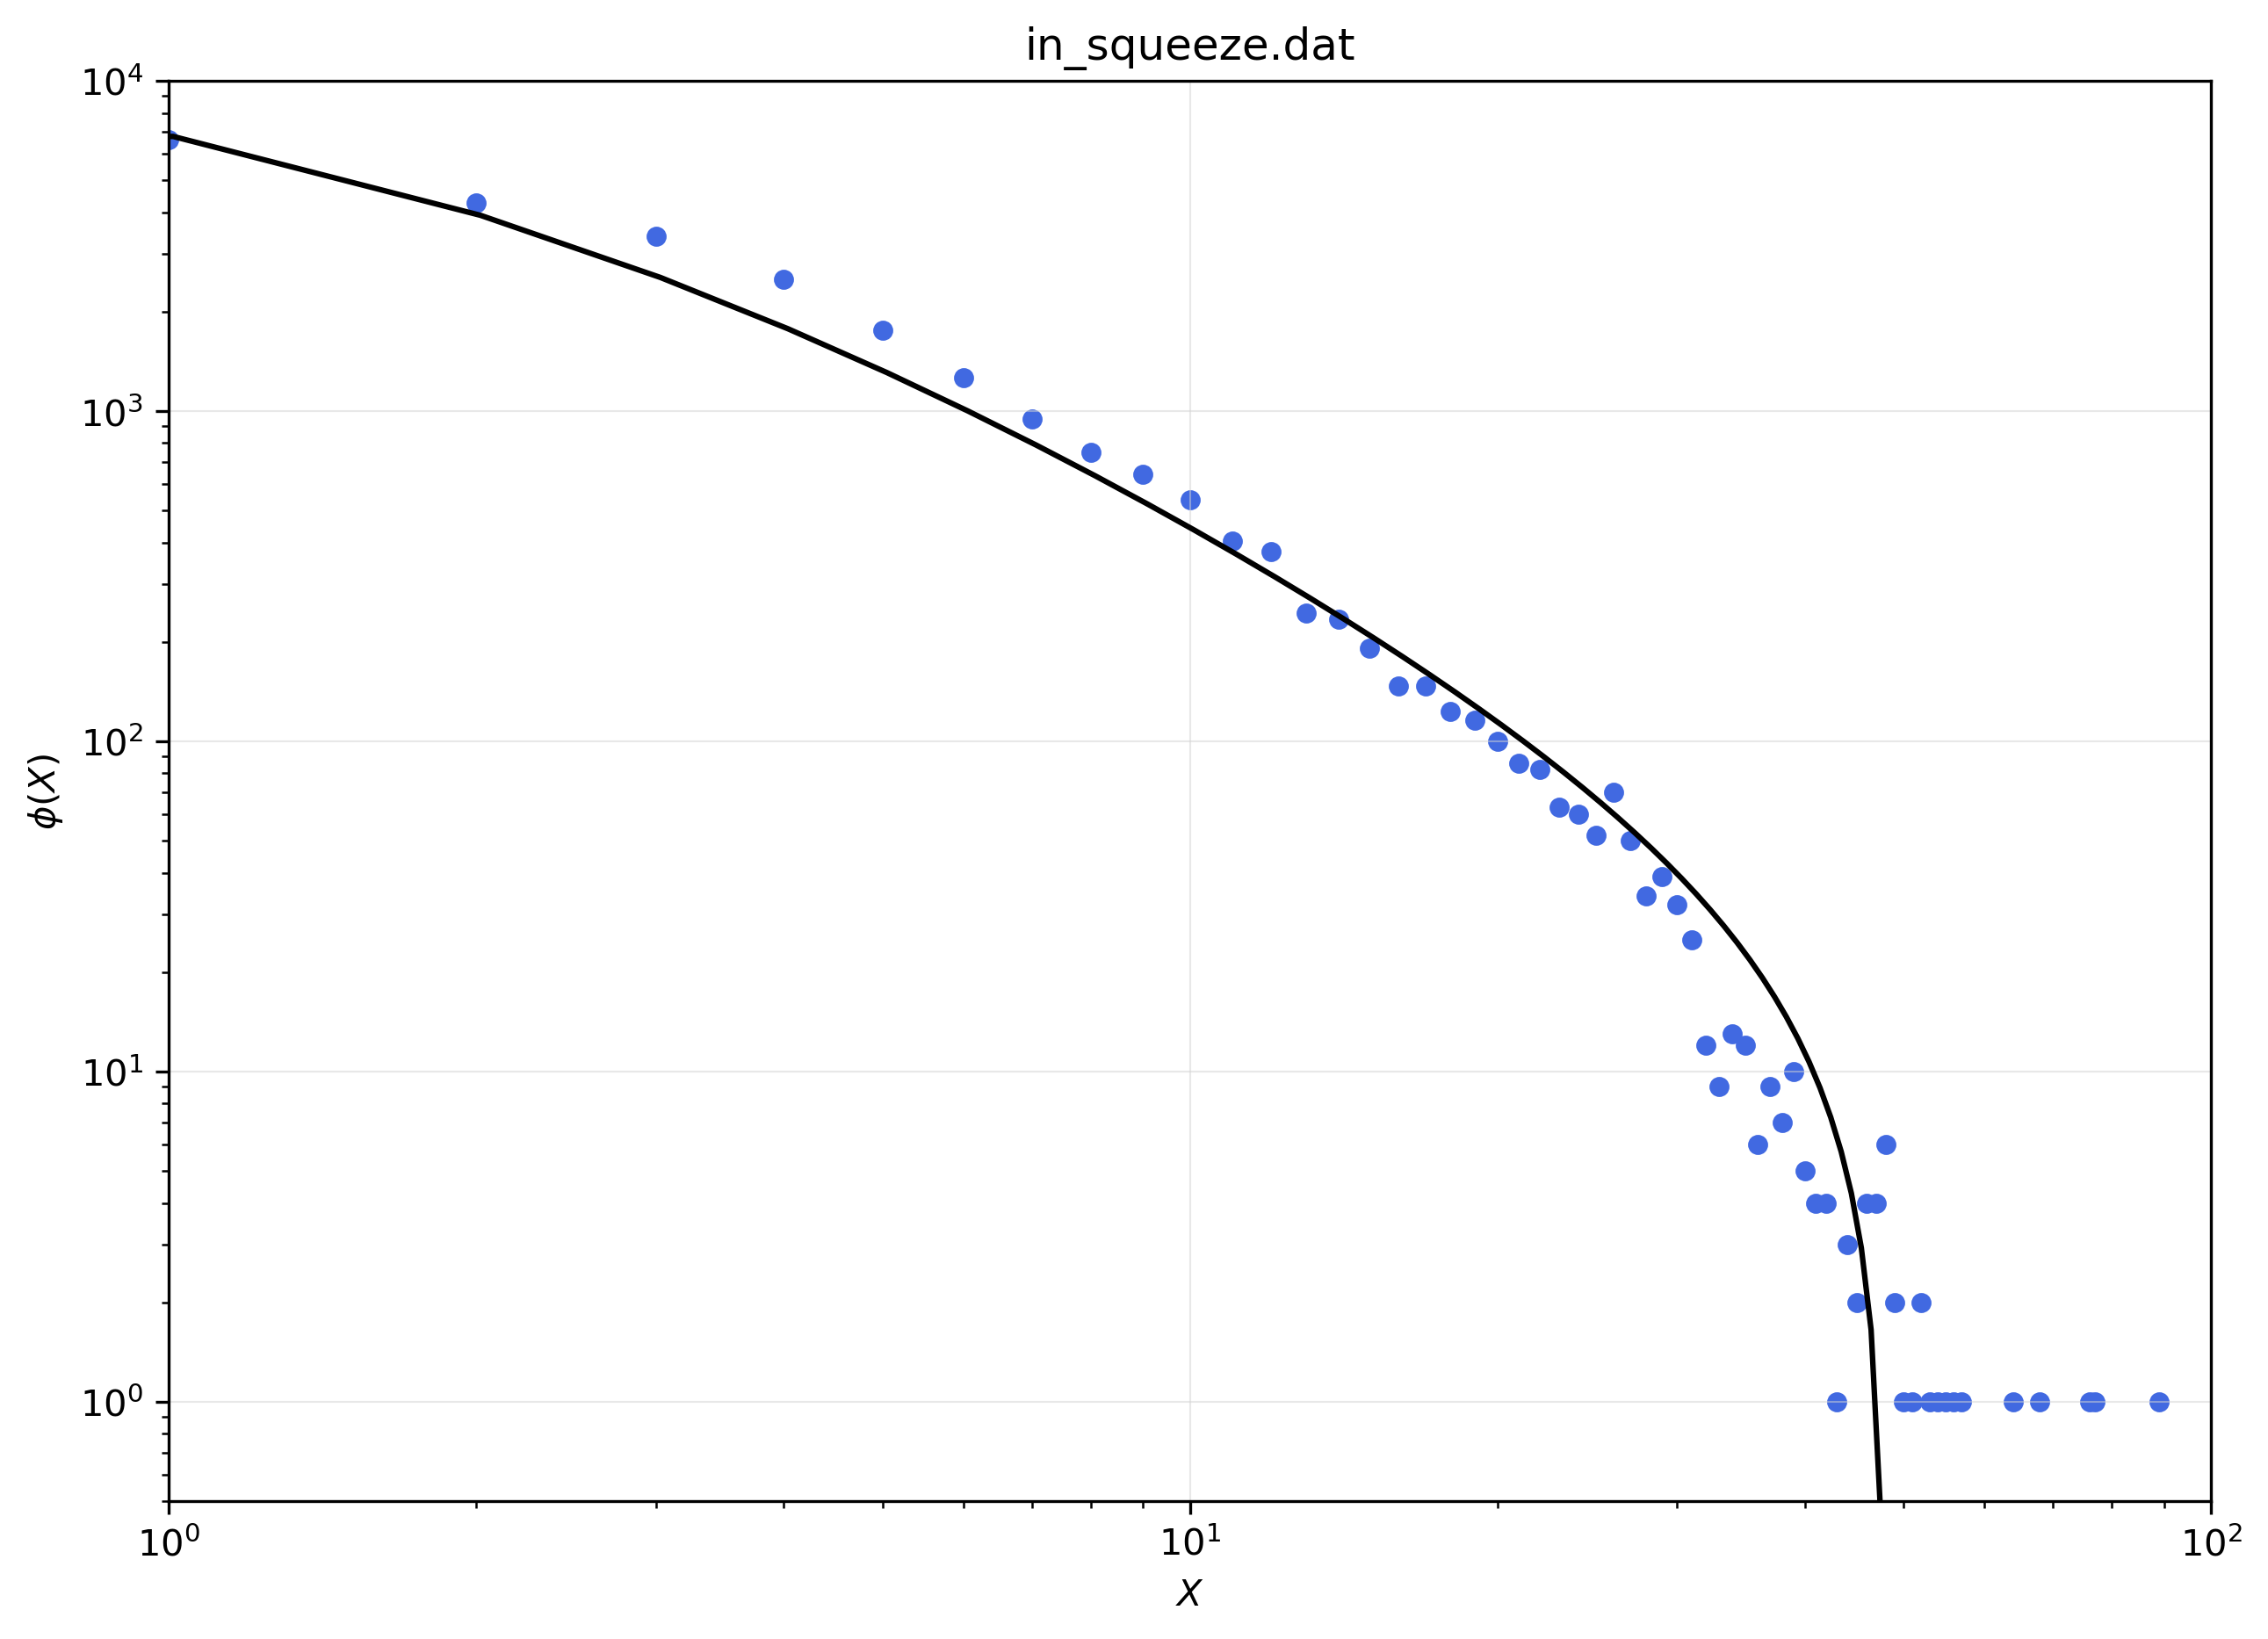

Mean Relative Error :  -1.0928409494463331
----------------------------------------------------------------------------------------------------------------------


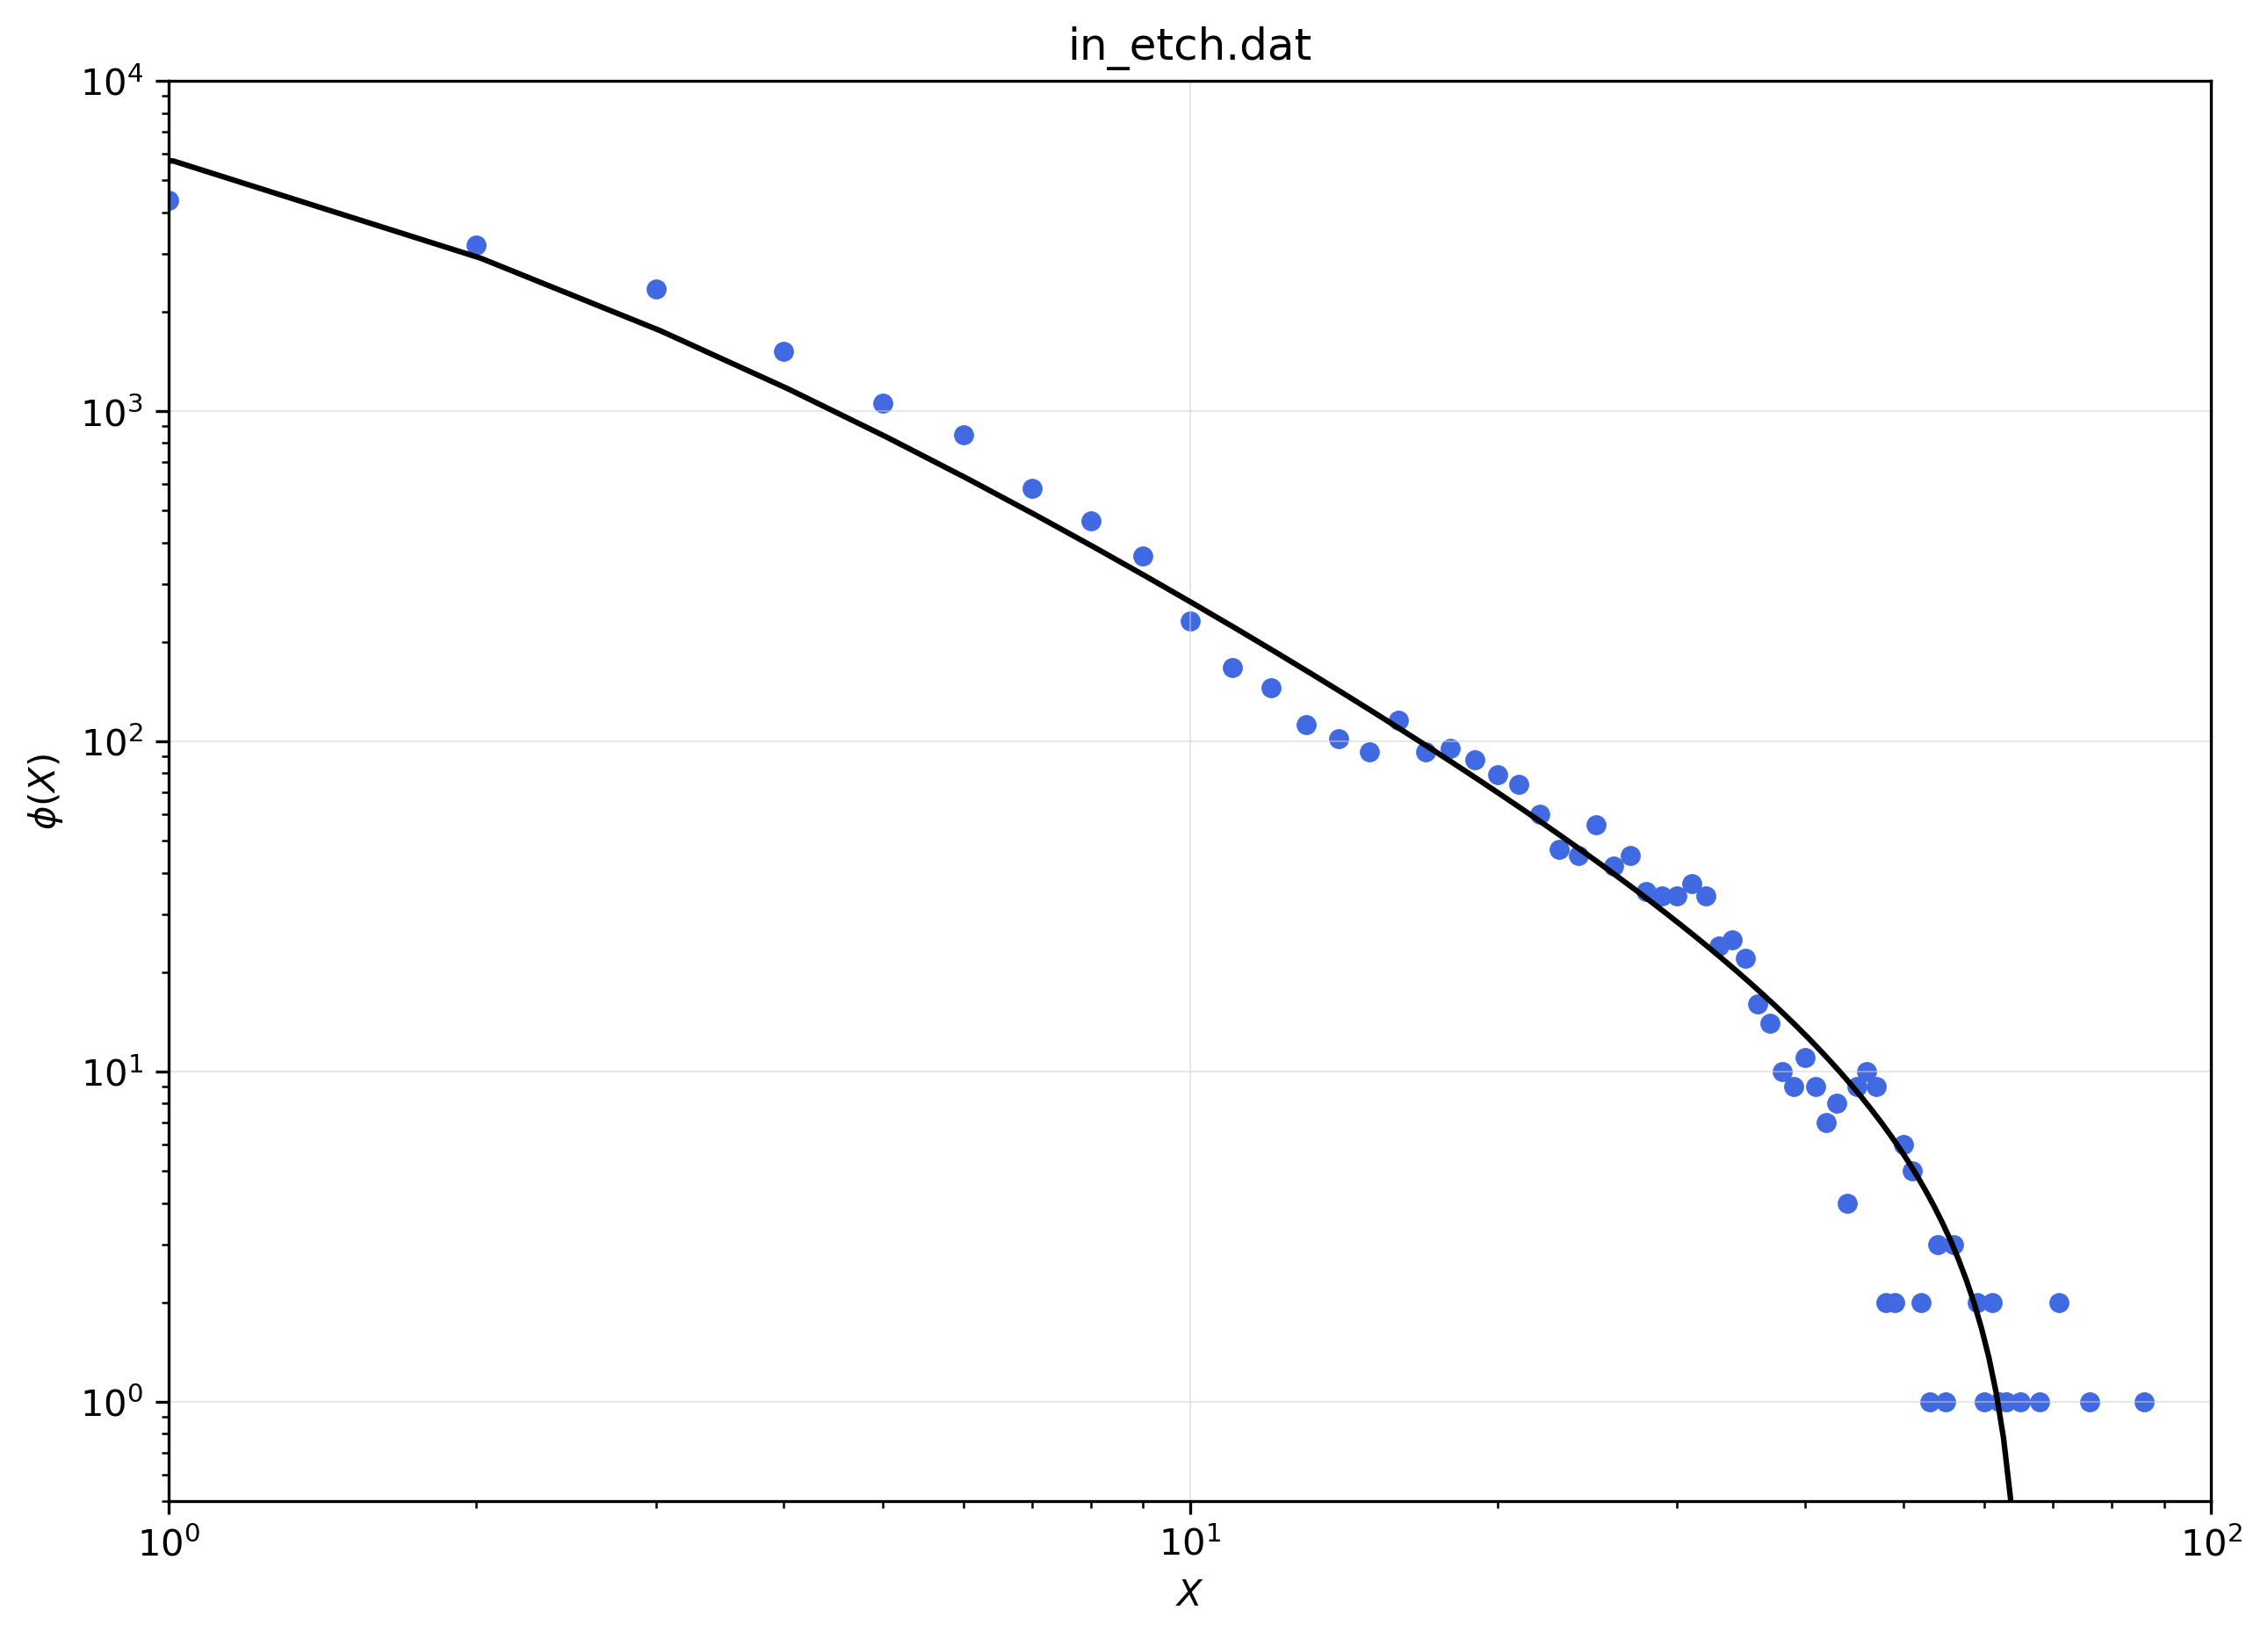

Mean Relative Error :  -0.09271252154096858
----------------------------------------------------------------------------------------------------------------------


In [335]:
for file in files:
    data = pd.read_csv(curr_dir + '/' + file, sep = '\s+', header = None)
    data.columns = ['x', 'y']
    data['x'] = data['x'].astype('float64')
    data['y'] = data['y'].astype('float64')
    data = data.sort_values(by = 'x')
    data = data.reset_index(drop = True)
    data.to_csv(curr_dir + '/' + file, index = False)
    plt.figure(figsize = (10, 7))
    plt.scatter(data['x'], data['y'], s = 20, color = 'royalblue')

    # if file if in type 
    if file.startswith('in'):
        x = np.linspace(0, 100, 100)
    else:
        x = np.linspace(0, 10000, 10000)
    # access dict_in_etch if file == 'in_etch.dat' similarly for all other files
    if file == 'in_etch.dat':
        dict = dict_in_etch
    elif file == 'out_etch.dat':
        dict = dict_out_etch
    elif file == 'in_lenny.dat':
        dict = dict_in_lenny
    elif file == 'out_lenny.dat':
        dict = dict_out_lenny
    elif file == 'in_squeeze.dat':
        dict = dict_in_squeeze
    elif file == 'out_squeeze.dat':
        dict = dict_out_squeeze
    y = phi_x(dict['ita'], x, dict['lmda'], dict['mu'], dict['alpha'], dict['c'])
    plt.plot(x, y,color = 'black', linewidth = 1.5)
    plt.xscale('log')
    plt.yscale('log')
    num = 10000
    if file.startswith('in'):
        num = 100
    plt.title(file)
    plt.xlim([1, num])
    plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.ylabel('$\phi(X)$')
    plt.xlabel('$X$')
    plt.ylim([0.5, 10000])
    plt.savefig(path + file + '.png')
    plt.show()
    plt.close()
    
    # statistical analysis: 
    dataa = data['y']
    modelled = phi_x(dict['ita'], data['x'], dict['lmda'], dict['mu'], dict['alpha'], dict['c'])
    relative_error = (dataa - modelled)/modelled
    print('Mean Relative Error : ', np.mean(relative_error))

    

    print('----------------------------------------------------------------------------------------------------------------------')


# Relative eror = data - modelled / modelled
            

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [337]:
def func(A, mu, B, l, t):
  return A*(mu + t*t)*np.exp(-(l*t-B)**2)

In [338]:
df = pd.read_csv('/Users/divya/Documents/Semester-6/Modelling and Simulation/Labs/Lab5/Q2/traffic_time.dat', header=None, sep='\s+')
df.rename(columns = {0: 'east', 1: 'time', 2: 'west'}, inplace = True)
print(df)

          east  time        west
0    58.183701 -11.0   41.740002
1    46.897999 -10.0   32.619999
2    39.204102  -9.0   31.900000
3    43.550999  -8.0   57.000000
4    64.693901  -7.0  144.759990
5   142.408200  -6.0  435.720000
6   237.775500  -5.0  691.780030
7   349.081600  -4.0  677.000000
8   358.000000  -3.0  486.859990
9   388.367310  -2.0  447.179990
10  395.428590  -1.0  411.579990
11  403.061190   0.0  380.660000
12  420.938810   1.0  402.859990
13  452.204100   2.0  413.660000
14  507.510190   3.0  428.299990
15  638.734680   4.0  451.060000
16  775.959230   5.0  454.880000
17  746.101990   6.0  425.820010
18  497.959200   7.0  308.780000
19  300.183690   8.0  202.880000
20  234.163300   9.0  174.500000
21  194.571400  10.0  141.179990
22  125.102000  11.0   98.680000
23   81.367302  12.0   60.480000


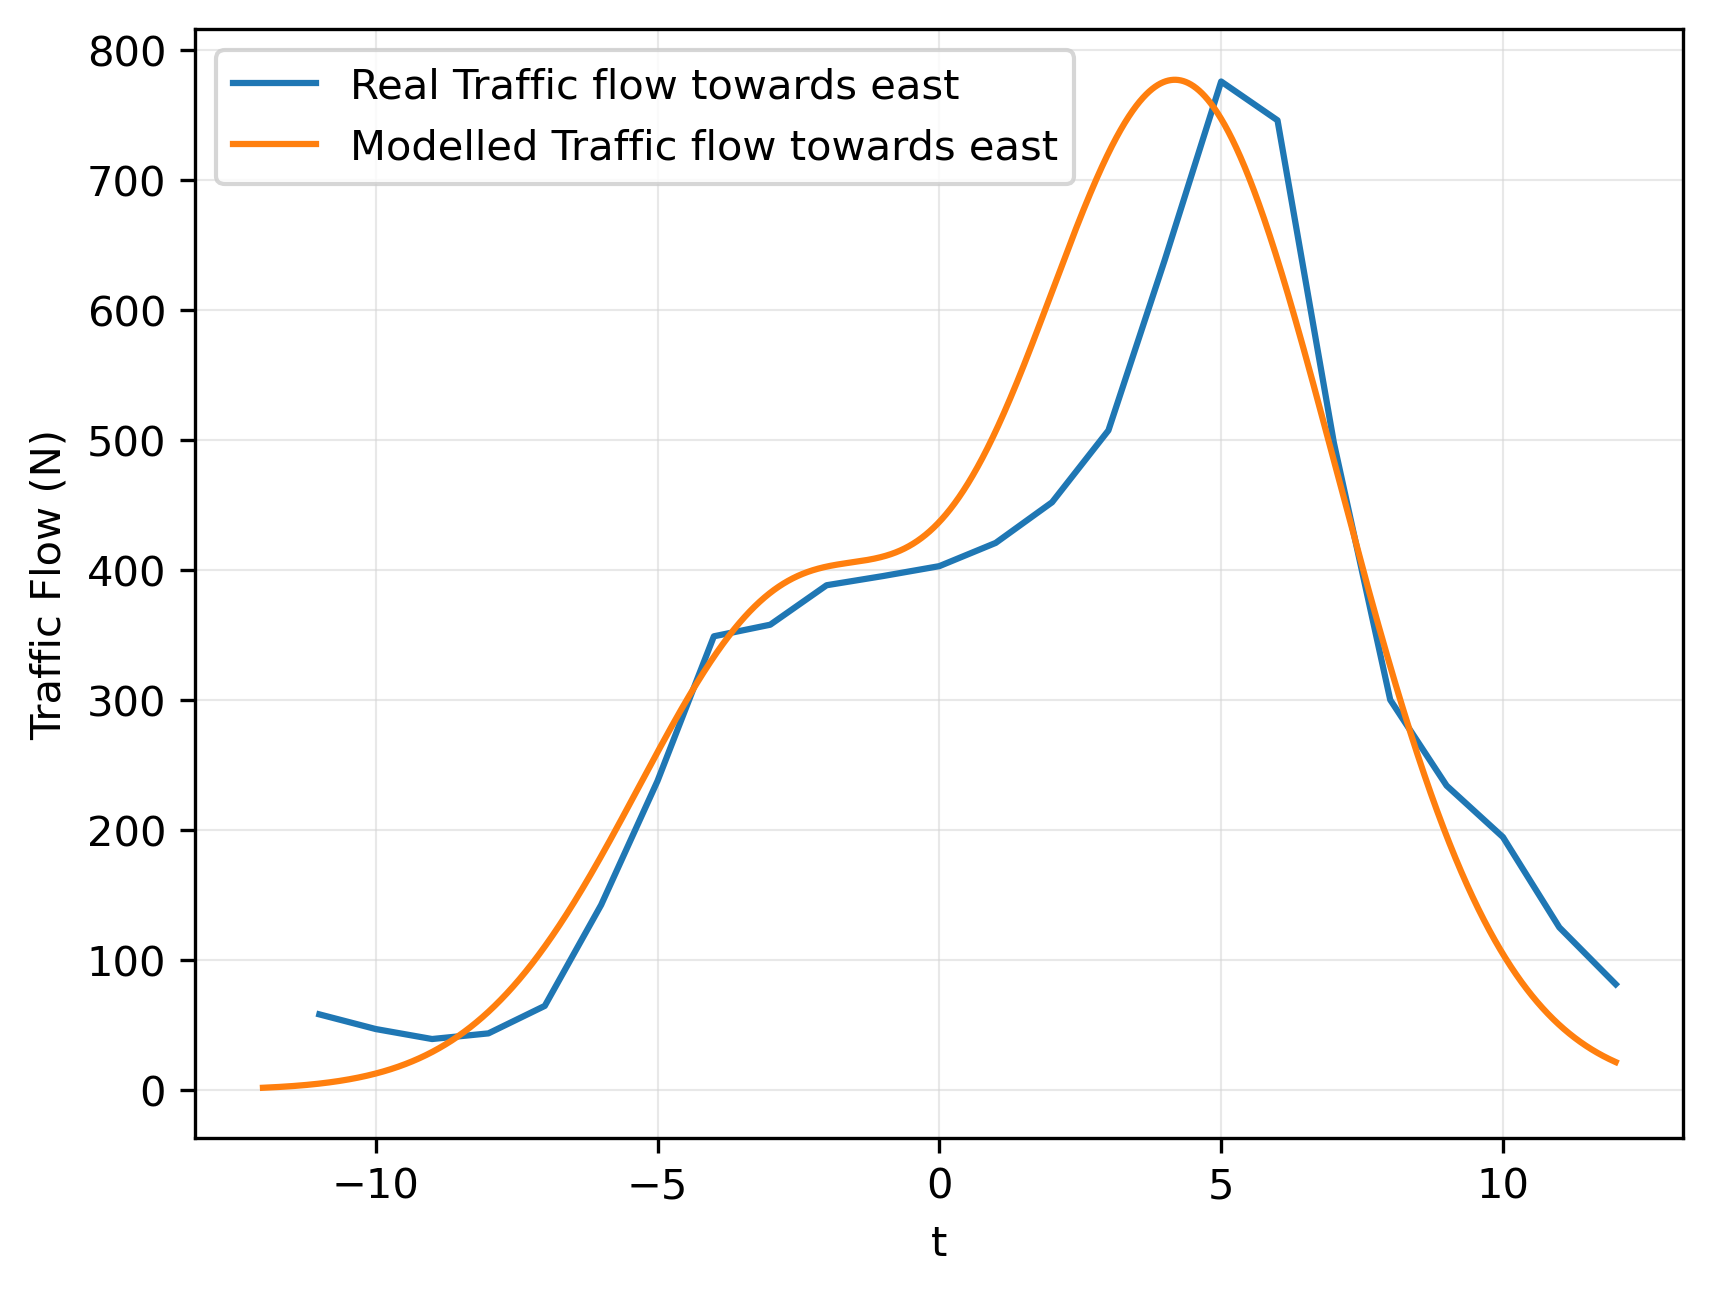

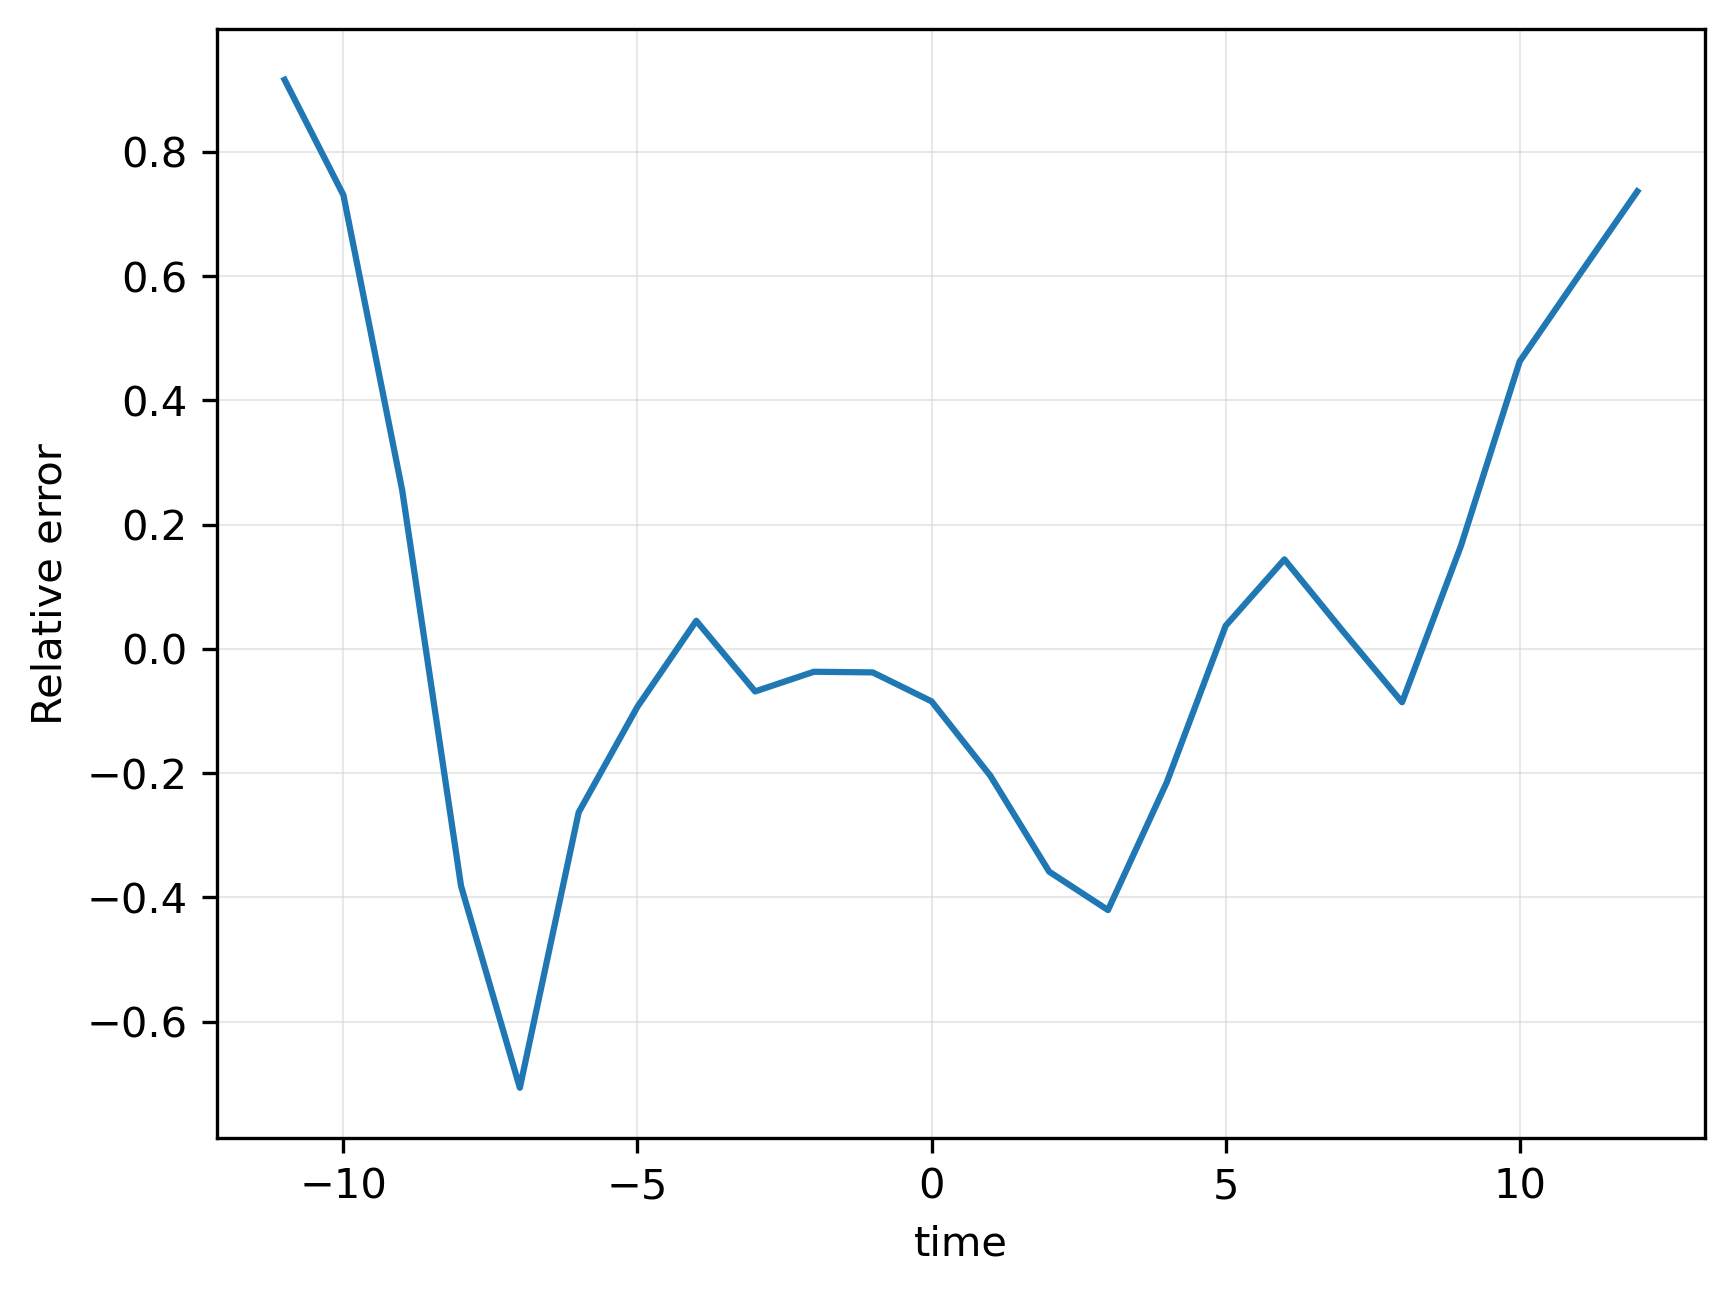

Standard deviation of relative error: 0.39191603735804736
Mean of relative error: 0.04842303822253156


In [339]:
t = np.arange(-12, 12, 0.001)
plt.plot(df['time'], df['east'])
plt.plot(t, func(44.1, 10.5, 0.24, 0.22, t))
plt.legend(['Real Traffic flow towards east', 'Modelled Traffic flow towards east'])
plt.ylabel('Traffic Flow (N)')
plt.xlabel('t')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.5)
plt.savefig(path + '/east_traffice.png')
plt.show()

error = (df['east'].values - func(44.1, 10.5, 0.24, 0.22, df['time'].values))/df['east'].values

plt.plot(df['time'], error)
plt.ylabel('Relative error')
plt.xlabel('time')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.5)
plt.savefig(path + '/east_error.png')
plt.show()
print('Standard deviation of relative error:', error.std())
print('Mean of relative error:', error.mean())

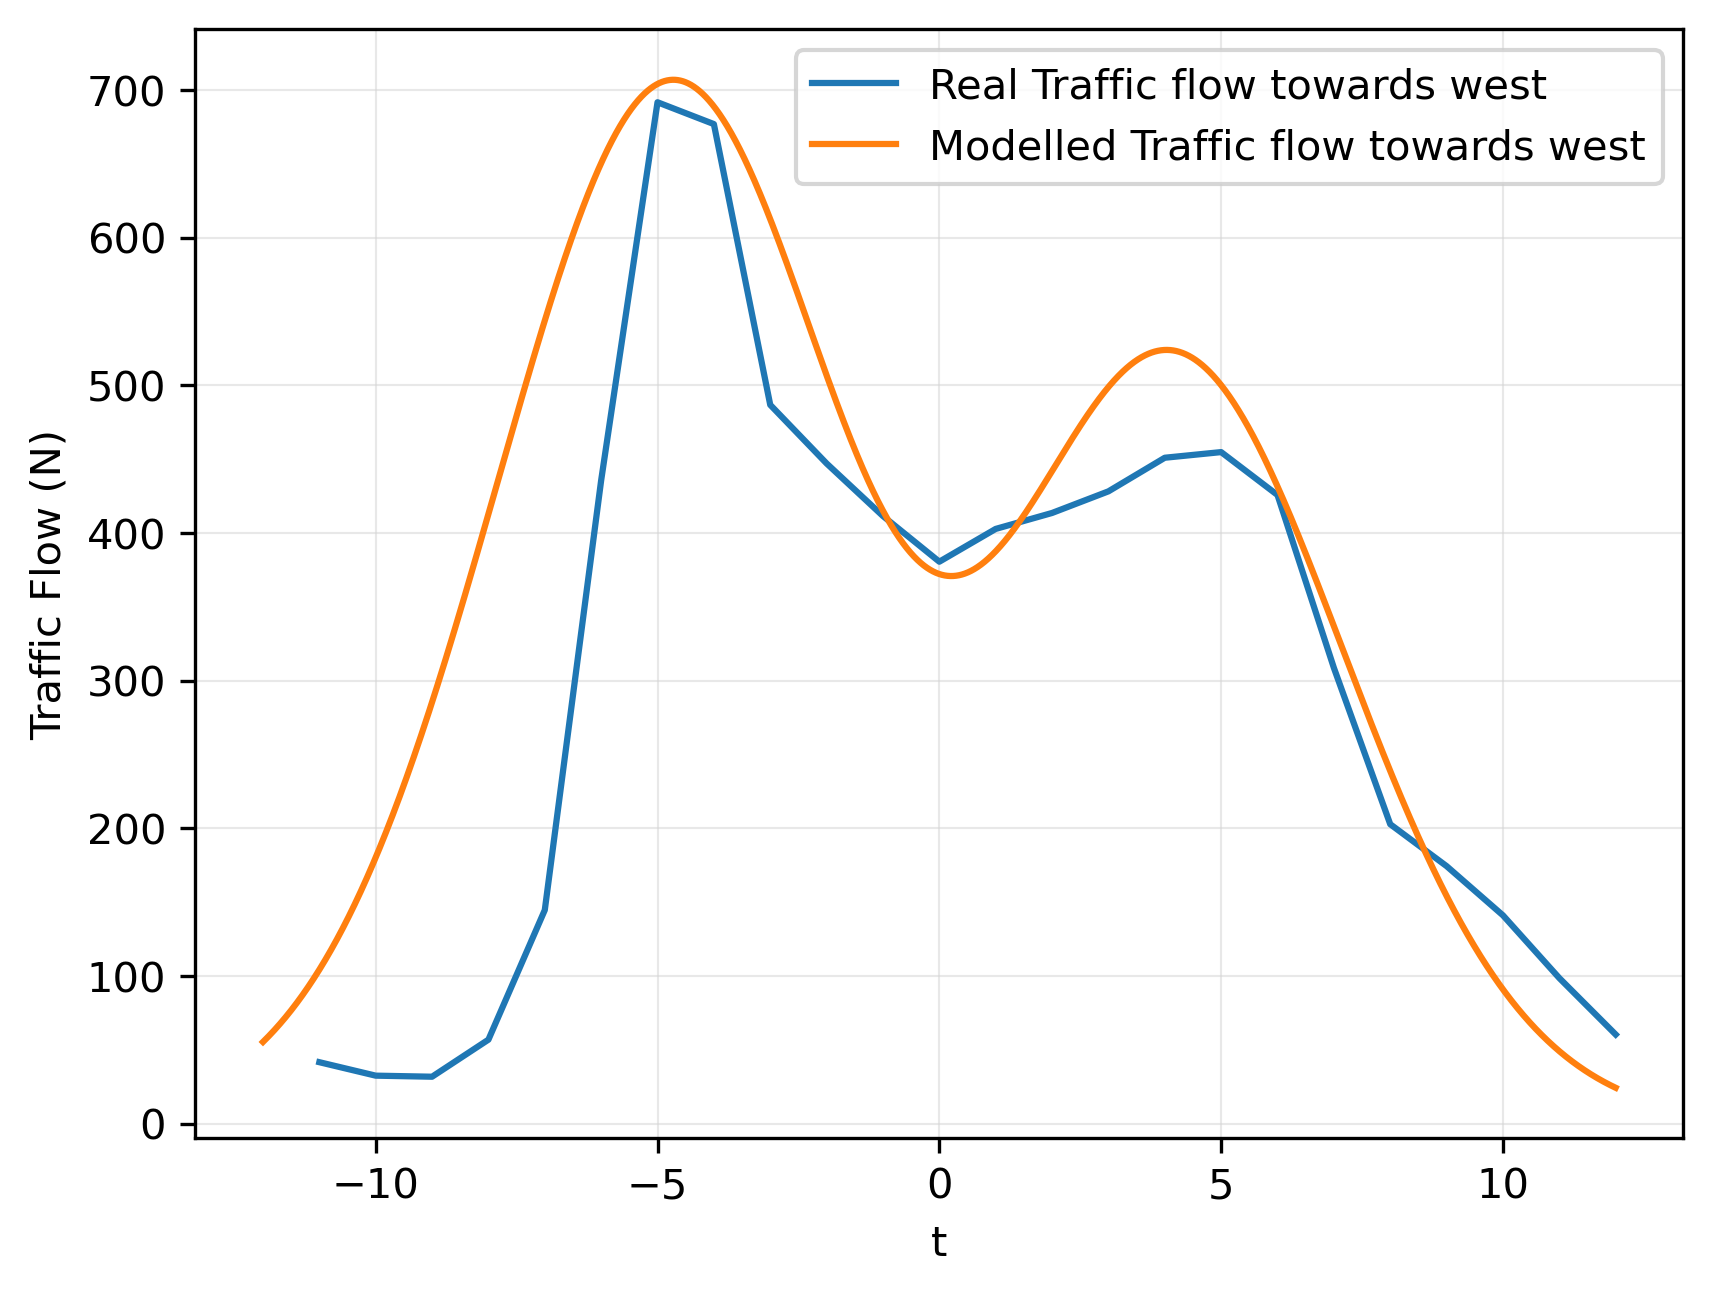

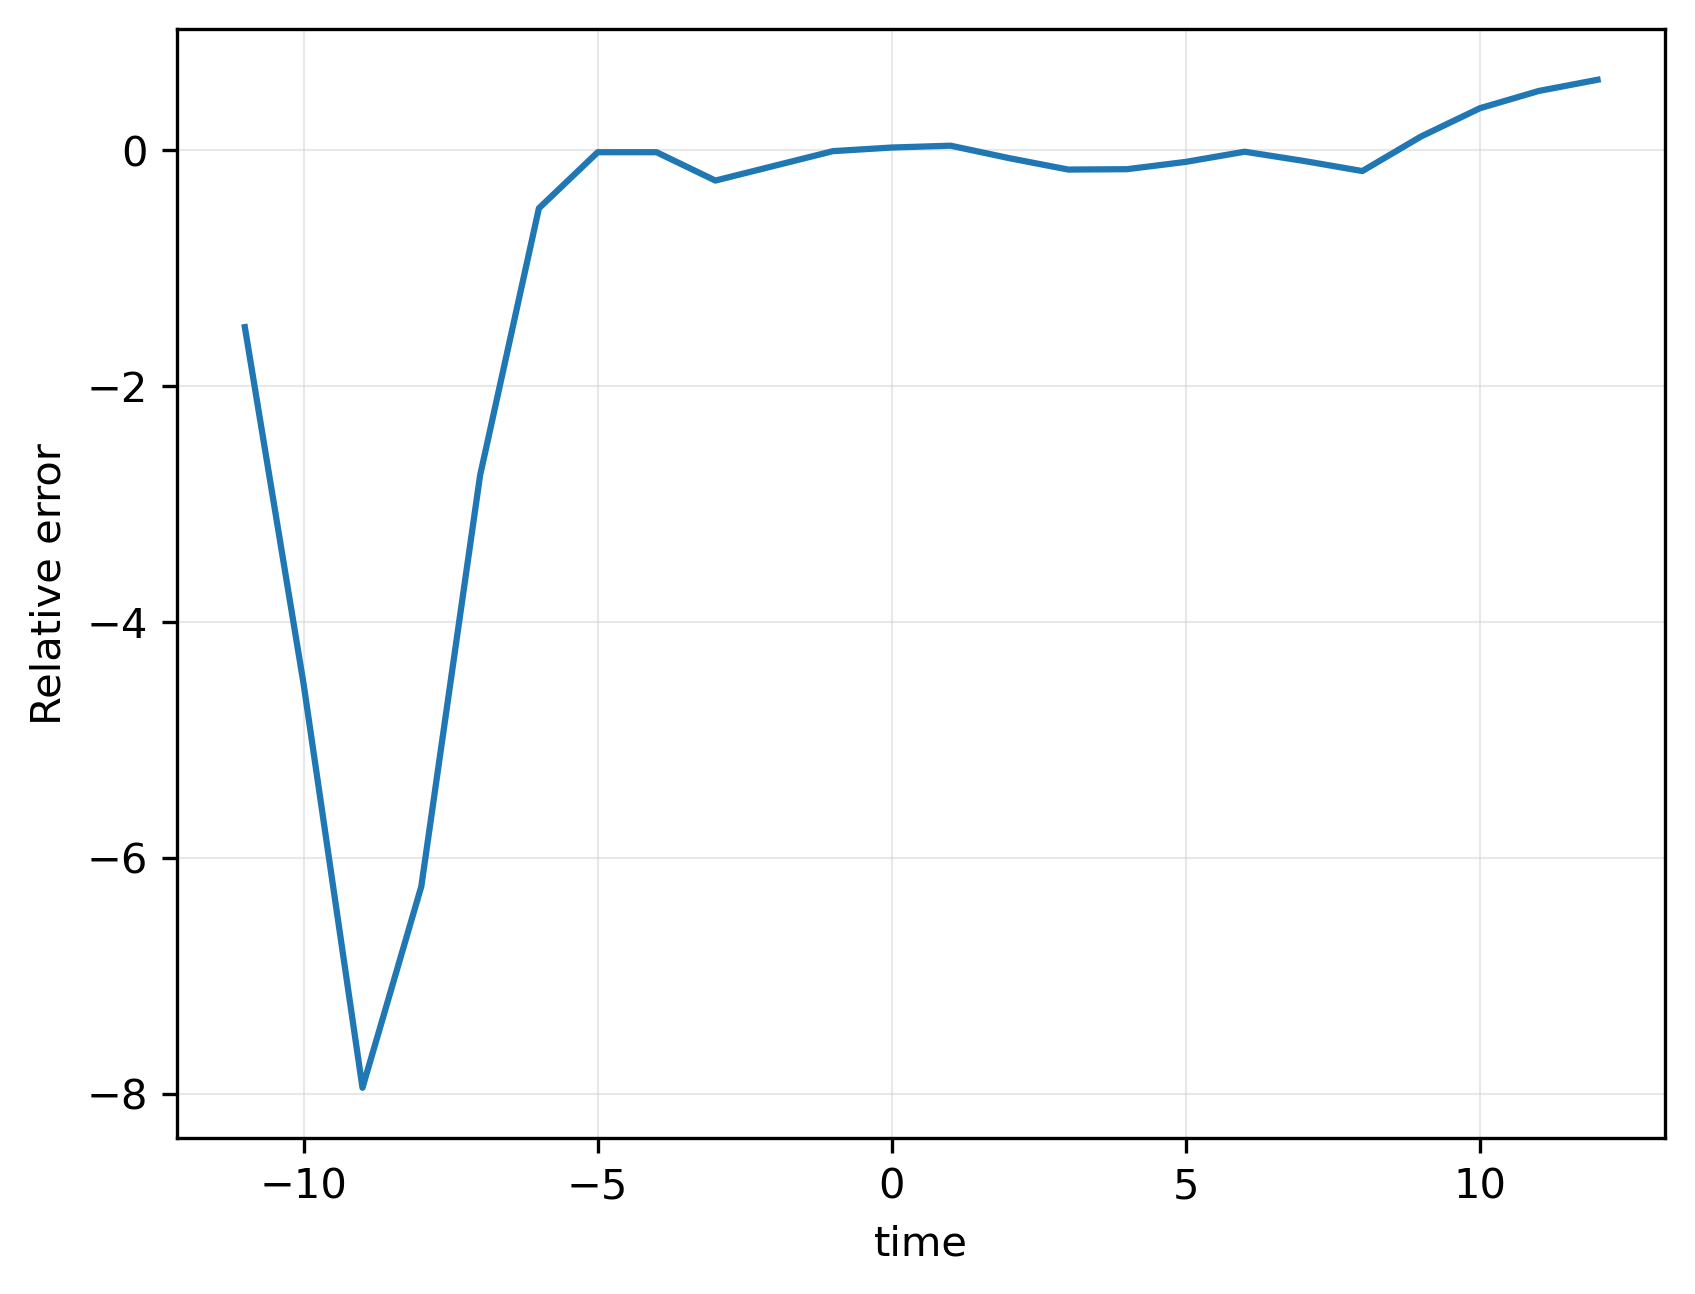

Standard deviation of relative error: 2.156526226860763
Mean of relative error: -0.9609109288062531


In [340]:
t = np.arange(-12, 12, 0.001)
plt.plot(df['time'], df['west'])
plt.plot(t, func(44, 8.53, -0.09, 0.19, t))
plt.legend(['Real Traffic flow towards west', 'Modelled Traffic flow towards west'])
plt.ylabel('Traffic Flow (N)')
plt.xlabel('t')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.5)
plt.savefig(path + '/west-traffic.png')
plt.show()

error = (df['west'].values - func(44, 8.53, -0.09, 0.19, df['time'].values))/df['west'].values

plt.plot(df['time'], error)
plt.ylabel('Relative error')
plt.xlabel('time')
# make light grey grid lines and set the transparency to 0.5
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.5)
plt.savefig(path + '/west_error.png')
plt.show()
print('Standard deviation of relative error:', error.std())
print('Mean of relative error:', error.mean())

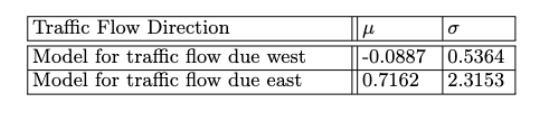

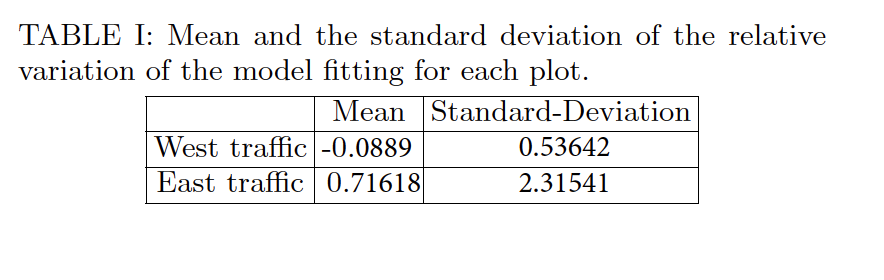

In [1]:
image.png


NameError: name 'image' is not defined